# Introduction

Diabetes is a chronic condition that affects the body’s ability to regulate blood sugar levels due to insufficient insulin production or the body's inability to use insulin effectively. It is classified into two main types: **Type 1 diabetes**, an autoimmune condition that destroys insulin-producing cells, and **Type 2 diabetes**, which occurs when the body becomes resistant to insulin. While Type 1 diabetes is less common, affecting about **5-10%** of cases, Type 2 accounts for **95%** and is strongly linked to lifestyle factors such as obesity and physical inactivity. Common symptoms include frequent urination, excessive thirst, fatigue, blurred vision, and slow-healing wounds. If left untreated, diabetes can lead to serious complications like heart disease, kidney failure, and nerve damage.  

In the United States, diabetes is a growing public health concern, with **38.4 million people** diagnosed as of 2021. The disease disproportionately affects racial and ethnic groups, with **American Indians/Alaska Natives (13.6%)**, **non-Hispanic Black adults (12.1%)**, and **Hispanic adults (11.7%)** experiencing higher prevalence compared to **Asian Americans (9.1%)** and **non-Hispanic White adults (6.9%)** [(Diabetes.org)](https://diabetes.org/about-diabetes/statistics/about-diabetes). Age is also a major factor, as nearly **29.2% of adults over 65** have diabetes, and the number of diagnosed young people is rising, with **352,000 individuals under 20** living with the disease. In 2018 alone, **8.2 million hospital stays** involved diabetes-related conditions, with **95%** of those attributed to Type 2 diabetes [(HCUP)](https://hcup-us.ahrq.gov/reports/statbriefs/sb279-Diabetes-Inpatient-Stays-2018.jsp).  

The rising prevalence of diabetes in the U.S. is driven by several factors, including **obesity, poor diet, physical inactivity, and socioeconomic disparities**. Over **40% of U.S. adults** are classified as obese, increasing their risk of developing Type 2 diabetes. Additionally, limited access to **healthy food, healthcare, and preventive education** contributes to higher rates, particularly in low-income communities. Genetic predisposition also plays a role, making certain racial and ethnic groups more vulnerable. As diabetes continues to strain the healthcare system and impact millions of lives, effective prevention and management strategies are essential to reduce complications and improve patient outcomes.




# Problem Statement

Between 2010 and 2019, there were 304 million hospitalizations above 18 years of age, of which 78 million were diabetes-associated hospitalizations. During both 2010 and 2019 majority of the hospitalizations for diabetes occurred in the age groups 60–69 and 70–79 years, followed by ≥80 years and 50–59 years. Among these hospitalizations, there was a greater proportion of females (52.2%) during 2010, whereas there was a greater proportion of males during 2019 (51.2%). During both years, the majority of these hospitalizations were among Whites, followed by Blacks, Hispanics, Asians or Pacific Islanders, and Native Americans. [National Library of Medicine](https://pmc.ncbi.nlm.nih.gov/articles/PMC9698503/#:~:text=Results-,Between%202010%20and%202019%2C%20there%20were%20304%20million%20hospitalizations%20above,%E2%80%936.0)


With an emphasis on several diabetes-related characteristics, this project uses ten years' worth of U.S. hospital data to forecast the risk of diabetes-related early hospital readmissions. Healthcare results can be significantly enhanced by anticipating diabetic patients' early readmissions. Hospitals can offer targeted care, including individualized treatment plans and closer monitoring, to high-risk patients prior to discharge, therefore reducing problems and readmissions. Additionally, this lowers medical expenses and maximizes hospital resources. Early intervention can improve patients' quality of life and long-term well-being by preventing their health from getting worse. In the end, early readmission prediction results in better healthcare practices, cost savings, and patient management.

# Objectives


1. **Develop a binary classification model to predict early patient readmissions (within 30 days of discharge)**  
   Early readmissions are a key indicator of healthcare quality and efficiency. By building a predictive model, we aim to identify high-risk patients who are likely to return to the hospital shortly after discharge.   

2. **Analyze how patient factors influence readmission risk** 
    Check how various factors such as demograpics, medical history, treatment etc may influence a patient being readmitted.

3. **Explore how medical procedures and lab tests impact readmissions**  
   Certain medical procedures or test results may indicate higher health risks, influencing the likelihood of readmission. Evaluating the role of number of lab procedures,number of procedures, number of medications can help identify if intensive medical intervention correlates with higher/lower risk of admission.

4. **Accurately evaluate our model’s predictive performance**  
   To ensure the model provides reliable predictions, we will assess its performance using metrics such as accuracy, precision, recall, and AUC-ROC scores. A well-validated model can be used to support real-world decision-making in hospitals and healthcare settings.  

5. **Provide actionable insights for targeted interventions**  
   Beyond model predictions, this project aims to generate insights that healthcare professionals can use to improve patient care. By identifying key risk factors for readmission, hospitals can develop personalized discharge plans, enhance follow-up care, and implement policies that reduce preventable hospital returns, ultimately improving overall healthcare efficiency.  
 

# Data Limitations

1. **Historical bias.** The data source of this project was colleected between the years 1999-2008, which may not capture the new health and technological innovations that may have arised over the years

2. **Limited Socioeconomic and Behavioral Data.** The dataset lacks important social and behavioral factors (e.g., income level, diet, lifestyle choices) that influence readmissions. This may limit  the ability to capture the full picture of why some patients return to the hospital.

3. **Lack of Clear Documentation.** Some column names contain abbreviations , with no explanations, making it difficult to interpret their exact meaning. Without proper documentation, there is a risk of misinterpreting variables, which could affect data analysis and model accuracy

4. **Complexity of Medical Terminology.** The dataset includes various medical terms, diagnoses, and medical terminologies that may be difficult to understand without domain expertise. 


# Data Source

https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-20

# Data Understanding

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('C:/Users/hp/Desktop/DATA NEXUS PROJECTS/Diabetes_130-US_Hospitals_1999-2008/diabetic_data.csv')
data.head() #display the first 5 rows of our dataset

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [3]:
data.tail() #display the last 5 rowws of our dataset

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO
101765,443867222,175429310,Caucasian,Male,[70-80),?,1,1,7,6,...,No,No,No,No,No,No,No,No,No,NO


In [4]:
data.shape #display the number of rows and columns in our dataset
#it has 101,766 rows and 50 columns

(101766, 50)

In [5]:
data.info() #display information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [6]:
data.columns #display the column names in our dataset

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [7]:
column_desc = pd.read_csv('C:/Users/hp/Desktop/DATA NEXUS PROJECTS/Diabetes_130-US_Hospitals_1999-2008/IDS_mapping.csv')
column_desc

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
...,...,...
62,22,Transfer from hospital inpt/same fac reslt in...
63,23,Born inside this hospital
64,24,Born outside this hospital
65,25,Transfer from Ambulatory Surgery Center


In [8]:
data.describe().T #display statistical summary of the data

,count,mean,std,min,25%,50%,75%,max
encounter_id,101766.0,1.652016e+08,1.026403e+08,12522.0,84961194.0,152388987.0,2.302709e+08,443867222.0
patient_nbr,101766.0,5.433040e+07,3.869636e+07,135.0,23413221.0,45505143.0,8.754595e+07,189502619.0
admission_type_id,101766.0,2.024006e+00,1.445403e+00,1.0,1.0,1.0,3.000000e+00,8.0
discharge_disposition_id,101766.0,3.715642e+00,5.280166e+00,1.0,1.0,1.0,4.000000e+00,28.0
admission_source_id,101766.0,5.754437e+00,4.064081e+00,1.0,1.0,7.0,7.000000e+00,25.0
time_in_hospital,101766.0,4.395987e+00,2.985108e+00,1.0,2.0,4.0,6.000000e+00,14.0
num_lab_procedures,101766.0,4.309564e+01,1.967436e+01,1.0,31.0,44.0,5.700000e+01,132.0
num_procedures,101766.0,1.339730e+00,1.705807e+00,0.0,0.0,1.0,2.000000e+00,6.0
num_medications,101766.0,1.602184e+01,8.127566e+00,1.0,10.0,15.0,2.000000e+01,81.0
number_outpatient,101766.0,3.693572e-01,1.267265e+00,0.0,0.0,0.0,0.000000e+00,42.0


In [9]:
data.dtypes #display the datatype of each column
#the data types represented are int64 (to represent numerical columns), and object (to represent categorical columns)

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [10]:
data.dtypes.value_counts() #our data has 37 columns with the object data type and 13 with the int64 data type

object    37
int64     13
dtype: int64

## Data Cleaning

The approach used is splitting the dataset into two groups: numerical and categorical columns. For each group, missing values are checked and handled to ensure the data is clean and ready for analysis.

### Categorical Columns Data Cleaning

In [11]:
categorical_col = data.select_dtypes(include=['object']).columns
categorical_col

Index(['race', 'gender', 'age', 'weight', 'payer_code', 'medical_specialty',
       'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [12]:
data.select_dtypes(include=['object']).isnull().sum() #check for missing values in the categorical columns


race                        0
gender                      0
age                         0
weight                      0
payer_code                  0
medical_specialty           0
diag_1                      0
diag_2                      0
diag_3                      0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolazamide                  0
examide                     0
citoglipton                 0
insulin                     0
glyburide-metformin         0
glipizide-metformin         0
glimepiride-pioglitazone    0
metformin-rosiglitazone     0
metformin-

After checking for missing values in the categorical columns, it indicates that none of the columns have any misssing values.
The next step, is to check whether all entries in the columns have the same structure

In [13]:
import pandas as pd

def categorical(data):
   
    # Iterate over each column
    for column in data.columns:
        # Check if the column is categorical, an object data type
        if data[column].dtype == "object":
            # Get the count of unique entries in the column
            unique_entries = data[column].value_counts()
            print(f"Unique entries in column '{column}':")
            print(unique_entries)
            print("\n")  


In [14]:
categorical(data)

Unique entries in column 'race':
Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64


Unique entries in column 'gender':
Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64


Unique entries in column 'age':
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64


Unique entries in column 'weight':
?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: weight, dtype: int64


Unique entries in column 'payer_code':
?     40256
MC    32439
HM     6274
SP     5007
BC     4655
MD     3532
CP     2533
UN     2448
CM     1937
OG     1033


Based on the output of the above, it is worth noting that most of the data in each column is consistent. However, some columns such as race, weight,payer_code and medical_speciality have a '?' entry which may represent missing entries. For better understandability of the project, we replace ? with NaN

In [15]:
import numpy as np
data.replace('?', np.nan , inplace=True)
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


#### Race Column

In [16]:
data['race'].isna().sum() #race has 2273 missing values

2273

In [17]:
pip install missingno fancyimpute


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\pip\_internal\cli\base_command.py", line 105, in _run_wrapper
    status = _inner_run()
  File "C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\pip\_internal\cli\base_command.py", line 96, in _inner_run
    return self.run(options, args)
  File "C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\pip\_internal\cli\req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\pip\_internal\commands\install.py", line 483, in run
    installed_versions[distribution.canonical_name] = distribution.version
  File "C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\pip\_internal\metadata\pkg_resources.py", line 192, in version
    return parse_version(self

<AxesSubplot:>

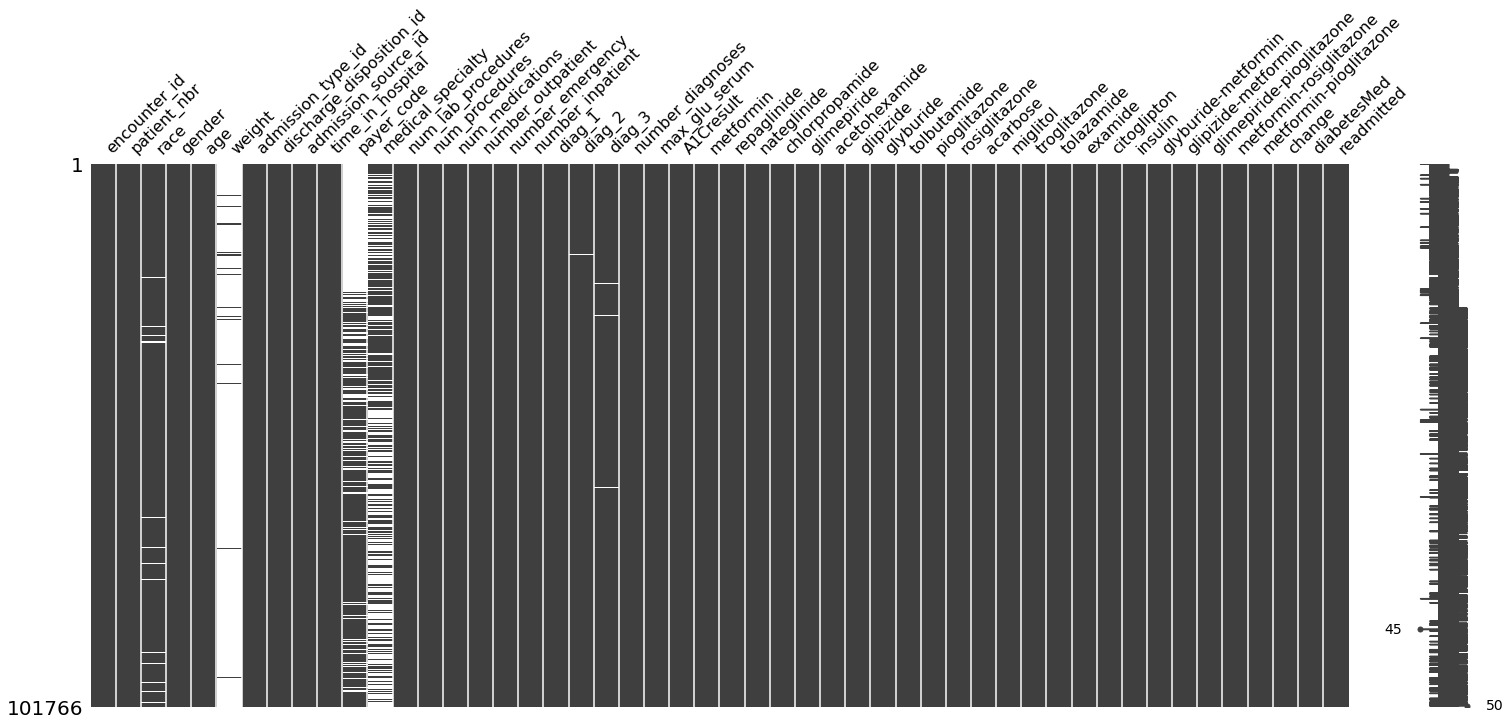

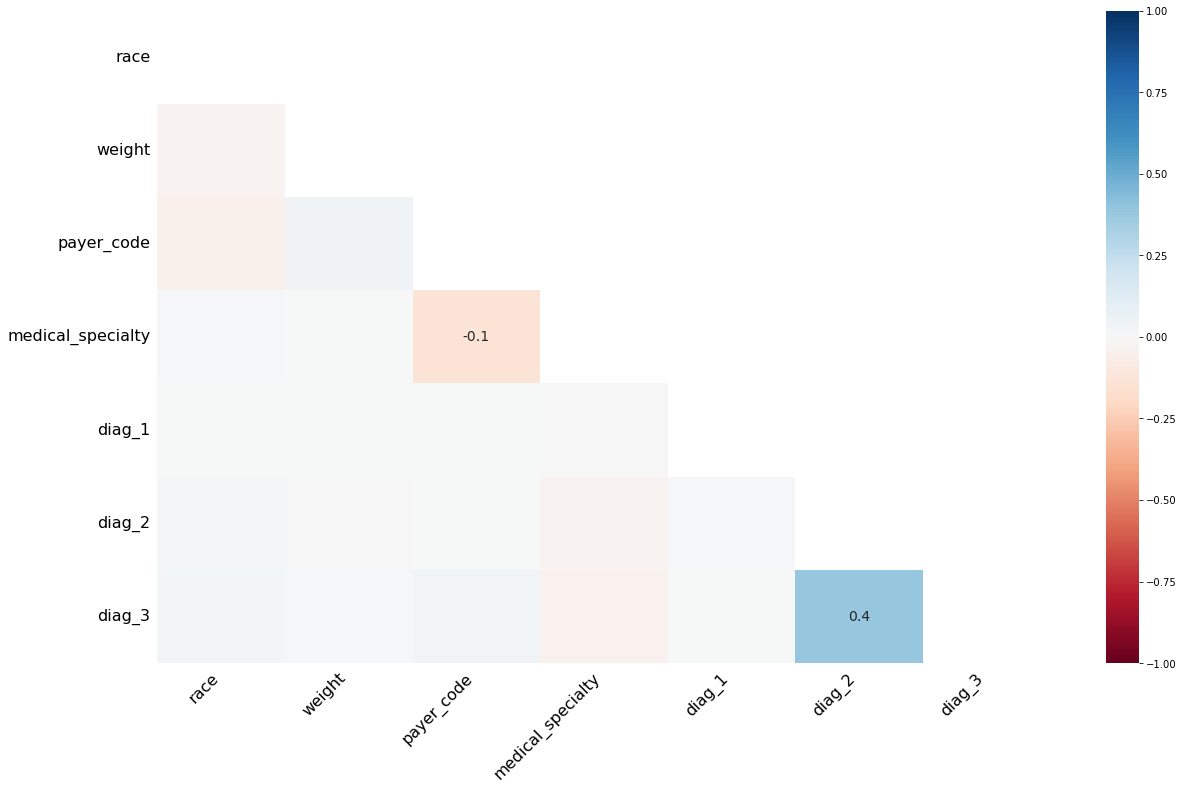

In [18]:
import missingno as msno
import pandas as pd

# Visualize missing data pattern
msno.matrix(data)
msno.heatmap(data) # Correlation heatmap of missing values


From the above, we are trying to determine which columns have NaN from the bar plot and check the type of missing data and if the missing data in these columns have any correlation.
Race, payer_code,diag_1,diag_3 having no correlation to other suggessts that it is a Missing Completely At Random type


In [19]:
data = data.dropna(subset=['race'])  # Removes rows where 'race' is NaN
#The best method to deal with the missing values in race, is to drop them as race is an individual entity that caannot be predicted or guessed

In [20]:
data['race'].isna().sum()

0

### Weight Column

In [21]:
data['weight'].isna().sum() 

96434

In [22]:
# data['weight'].fillna(data['weight'].mode()[0], inplace=True) #fill missing values in weight with mode

In [23]:
#  data['weight'].isna().sum() 

The reason for filling missing values in the weight column with imputation method mode, is because a large portion of the data in weight and missing and dropping these would distort our analysis. Also, other imputation such as mean and median would not give accurate information because the weight data is categorical and would be impossible to calculate its mean or median.

In [24]:
# data = data.dropna(subset=['weight'])

In [25]:
# data['weight'].isna().sum() 

In [26]:
# import matplotlib.pyplot as plt

# # Plot the distribution of 'weight' after imputation
# data['weight'].value_counts().plot(kind='bar', color='skyblue', alpha=0.7)
# plt.title('Distribution of Weight After Imputation')
# plt.xlabel('Weight Categories')
# plt.ylabel('Frequency')
# plt.show()


After filling missing values with mode, the value count of weight range (75-100) increased to around 97000, which would suggest a majority of the people are in this weight range, introducing potential bias as this may not be true. So, I went ahead and dropped the missing values instead. 

In [27]:
# Impute missing values with a placeholder category like 'unknown'
data['weight'] = data['weight'].fillna('Unknown')

In [28]:
data['weight'].value_counts()

Unknown      96434
[75-100)      1279
[50-75)        861
[100-125)      596
[125-150)      136
[25-50)         93
[0-25)          47
[150-175)       34
[175-200)       10
>200             3
Name: weight, dtype: int64

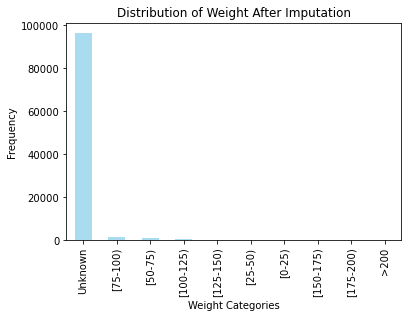

In [29]:
import matplotlib.pyplot as plt

# Plot the distribution of 'weight' after imputation
data['weight'].value_counts().plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Distribution of Weight After Imputation')
plt.xlabel('Weight Categories')
plt.ylabel('Frequency')
plt.show()


Since dropping the missing values in weight meant losing almost 97% of our data, I decided to handle the missing values by using a placeholder 'Unkown' fofr the missing values. This helps retain a majority of the data

In [30]:
data.shape

(99493, 50)

### Payer_Code Column

In [31]:
data['payer_code'].isna().sum() 

39712

In [32]:
data['payer_code'].value_counts(dropna=False)


NaN    39712
MC     31605
HM      6128
SP      4763
BC      4541
MD      3434
CP      2463
UN      2284
CM      1919
OG      1025
PO       589
DM       534
CH       144
WC       125
OT        95
MP        77
SI        55
Name: payer_code, dtype: int64

In [33]:
data = data.dropna(subset=['payer_code'])

In [34]:
data['payer_code'].isna().sum() 

0

In [35]:
data.shape

(59781, 50)

### Medical_Specialty Column

In [36]:
data['medical_specialty'].isna().sum() 

32641

In [37]:
#data['medical_specialty'].value_counts(dropna=False)
data['medical_specialty'] = data['medical_specialty'].fillna('Unknown')

In [38]:
#data = data.dropna(subset=['medical_specialty'])

In [39]:
data['medical_specialty'].isna().sum() 

0

In [40]:
data['medical_specialty'].value_counts()

Unknown                              32641
Emergency/Trauma                      7043
InternalMedicine                      6005
Family/GeneralPractice                3206
Cardiology                            2322
Surgery-General                       1877
Radiologist                           1041
Nephrology                             946
Orthopedics                            860
Surgery-Vascular                       345
Gastroenterology                       333
Surgery-Cardiovascular/Thoracic        313
Pulmonology                            312
Orthopedics-Reconstructive             307
Urology                                295
ObstetricsandGynecology                290
Psychiatry                             274
Surgery-Neuro                          185
Oncology                               173
Neurology                              159
Podiatry                                82
Hematology                              71
Psychology                              70
Hospitalist

Contigency Table to check correlation of categorical columns with readmitted

In [41]:
# import pandas as pd
# import numpy as np
# from scipy.stats import chi2_contingency

# # Function to calculate Cramér's V
# def cramers_v(confusion_matrix):
#     chi2_stat, p_val, dof, ex = chi2_contingency(confusion_matrix)
#     n = confusion_matrix.sum().sum()
#     return np.sqrt(chi2_stat / (n * (min(confusion_matrix.shape) - 1)))

# # List of categorical columns (you can add more based on your dataset)
# categorical_columns = categorical_col
# # Initialize an empty dictionary to store the Cramér's V values
# cramers_v_dict = {}

# # Calculate Cramér's V for each categorical column
# for col in categorical_columns:
#     confusion_matrix = pd.crosstab(data[col], data['readmitted'])
#     cramers_v_dict[col] = cramers_v(confusion_matrix)

# # Convert the results into a DataFrame for easy reading
# cramers_v_df = pd.DataFrame(list(cramers_v_dict.items()), columns=['Categorical Feature', "Cramér's V"])
# cramers_v_df


#### Label Encode Readmitted Column

In [42]:
data['readmitted'] = data['readmitted'].replace({'NO': 0, '>30': 1, '<30': 2})
data['readmitted'].sample(50)

74634     1
63777     0
84249     2
31642     1
49295     0
81650     1
72670     1
45202     0
93116     0
88121     0
49435     1
28439     0
49624     0
55537     1
47862     0
54326     1
58518     0
27253     0
88911     1
73902     0
72167     2
88004     1
79834     2
64441     2
40036     1
90478     0
59615     0
59324     0
81757     1
38952     0
36114     0
75735     0
91612     2
32306     0
58291     0
64136     0
96745     1
47919     0
74753     2
93668     0
100623    0
91628     0
38559     0
95337     0
60762     1
43164     0
59475     1
83166     0
76693     1
99712     1
Name: readmitted, dtype: int64

In [43]:
# Dropping unnecessary columns safely
data = data.drop(['examide','citoglipton'], axis=1)


In [44]:
data.shape

(59781, 48)

## Numerical Columns Data Cleaning

In [45]:
numerical_col = data.select_dtypes(include=['int64']).columns
numerical_col

Index(['encounter_id', 'patient_nbr', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses', 'readmitted'],
      dtype='object')

In [46]:
data.select_dtypes(include=['int64']).isnull().sum() #check for missing values in the categorical columns


encounter_id                0
patient_nbr                 0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
number_diagnoses            0
readmitted                  0
dtype: int64

In [47]:
import pandas as pd

def numerical(data):
   
    # Iterate over each column
    for column in data.columns:
        # Check if the column is categorical, an object data type
        if data[column].dtype == "int64":
            # Get the count of unique entries in the column
            unique_entries = data[column].value_counts()
            print(f"Unique entries in column '{column}':")
            print(unique_entries)
            print("\n")  


In [48]:
numerical(data)

Unique entries in column 'encounter_id':
72091308     1
240186060    1
240168138    1
240169902    1
240170652    1
            ..
158997210    1
158997900    1
159002352    1
159003174    1
443857166    1
Name: encounter_id, Length: 59781, dtype: int64


Unique entries in column 'patient_nbr':
88785891     40
43140906     28
88227540     23
84428613     22
92709351     21
             ..
89387505      1
75254229      1
98953641      1
52005600      1
120975314     1
Name: patient_nbr, Length: 40157, dtype: int64


Unique entries in column 'admission_type_id':
1    33312
3    12326
2    10981
5     3133
7       20
4        5
6        4
Name: admission_type_id, dtype: int64


Unique entries in column 'discharge_disposition_id':
1     35654
3      9950
6      8132
2      1414
22     1396
11      956
7       411
4       383
5       374
13      300
23      296
14      274
28      109
24       40
18       23
8        17
9        17
15       10
19        8
16        7
17        6
27        2

In [49]:
data.corr(method = 'pearson')

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted
encounter_id,1.000000,0.399405,-0.156596,0.015168,-0.062664,-0.027902,0.040087,0.019798,0.068042,0.057175,0.036176,0.037619,0.251615,-0.033506
patient_nbr,0.399405,1.000000,-0.058040,0.012577,-0.025358,0.001661,0.044891,0.002098,-0.017193,0.069512,0.031676,0.005245,0.250323,0.065301
admission_type_id,-0.156596,-0.058040,1.000000,0.018237,-0.318542,-0.022384,-0.269338,0.136562,0.060152,0.052641,-0.023327,-0.038298,-0.076481,-0.033200
discharge_disposition_id,0.015168,0.012577,0.018237,1.000000,0.020954,0.178315,0.069865,0.008403,0.157656,0.016875,-0.009770,0.038363,0.121104,0.030378
admission_source_id,-0.062664,-0.025358,-0.318542,0.020954,1.000000,0.010914,0.034314,-0.186660,-0.076402,0.019741,0.065792,0.061165,0.123286,0.021385
time_in_hospital,-0.027902,0.001661,-0.022384,0.178315,0.010914,1.000000,0.332583,0.169474,0.478013,-0.000329,-0.002160,0.067409,0.219540,0.049132
num_lab_procedures,0.040087,0.044891,-0.269338,0.069865,0.034314,0.332583,1.000000,0.016650,0.291709,0.009213,0.010643,0.034500,0.169782,0.037018
num_procedures,0.019798,0.002098,0.136562,0.008403,-0.186660,0.169474,0.016650,1.000000,0.346864,-0.016480,-0.035566,-0.060671,0.050434,-0.033536
num_medications,0.068042,-0.017193,0.060152,0.157656,-0.076402,0.478013,0.291709,0.346864,1.000000,0.048745,0.010274,0.081626,0.263607,0.062236
number_outpatient,0.057175,0.069512,0.052641,0.016875,0.019741,-0.000329,0.009213,-0.016480,0.048745,1.000000,0.075575,0.107239,0.091848,0.072461


In [50]:
numerical_col.shape

(14,)

### Concatenate Numerical and Categorical Columns

In [51]:
numerical_cols = data.select_dtypes(include=['number'])  
print(numerical_cols.shape)  # Prints the number of rows and columns of numerical columns


(59781, 14)


In [52]:
categorical_cols = data.select_dtypes(include=['object'])  
print(categorical_cols.shape)  # Prints the number of rows and columns of categorical columns


(59781, 34)


In [53]:
numerical_cols = data.select_dtypes(include=['number'])  # selects numerical columns
categorical_cols = data.select_dtypes(include=['object'])  # selects categorical columns

# Now concatenate them
final_data = pd.concat([numerical_cols, categorical_cols], axis=1)
final_data.head()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
20446,72091308,20123568,1,22,7,7,58,2,15,0,...,No,No,Steady,No,No,No,No,No,Ch,Yes
20737,72848634,20377854,2,1,1,3,59,3,11,0,...,No,No,Steady,No,No,No,No,No,No,Yes
20824,73062156,20408121,1,1,7,4,56,1,9,0,...,No,No,No,No,No,No,No,No,No,Yes
21083,73731852,20542797,1,2,7,10,68,1,18,0,...,No,No,Steady,No,No,No,No,No,Ch,Yes
23668,80820942,20514150,2,1,1,4,33,0,11,0,...,No,No,Up,No,No,No,No,No,Ch,Yes


In [54]:
final_data.shape

(59781, 48)

#### Checking for Outliers

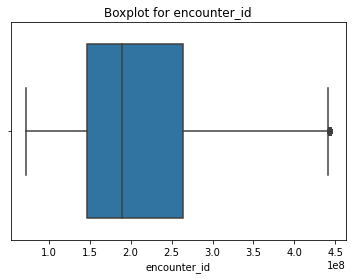

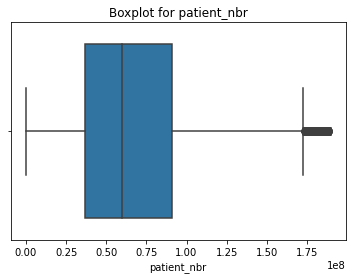

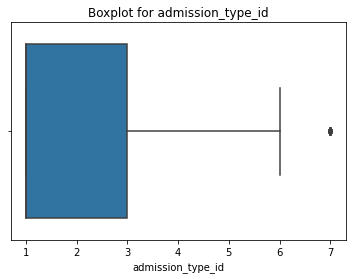

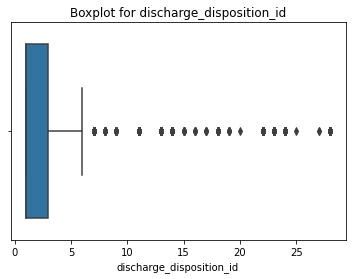

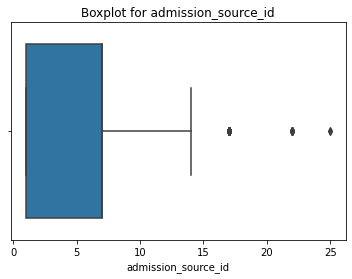

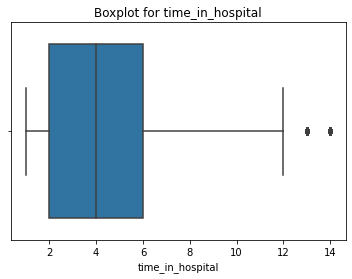

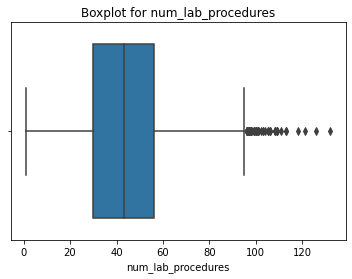

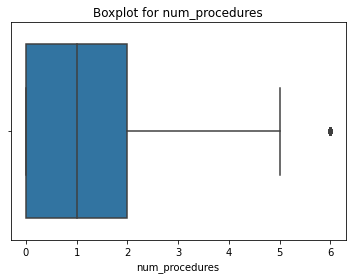

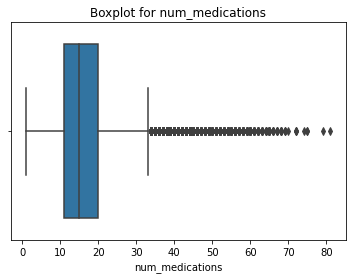

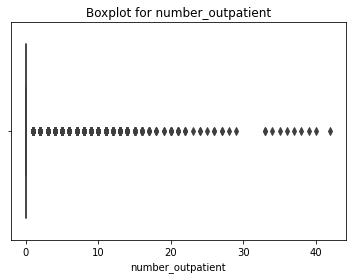

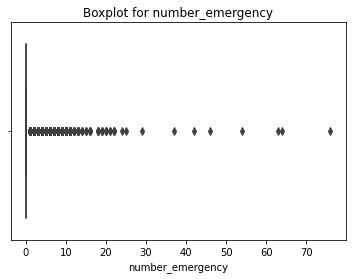

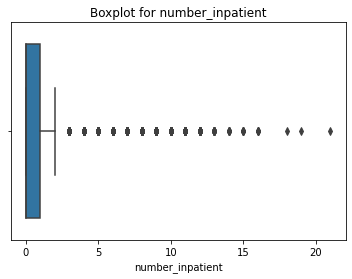

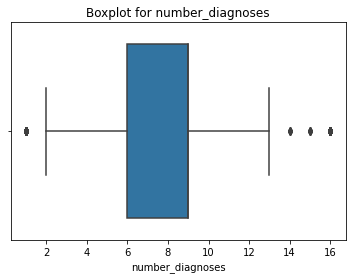

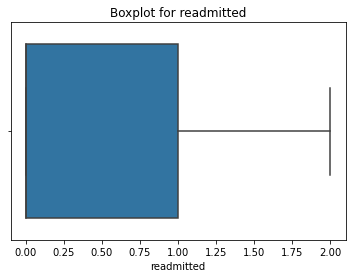

In [55]:
for column in data.select_dtypes(include=['int64']).columns:
    sns.boxplot(data=final_data, x=column)
    plt.title(f'Boxplot for {column}')
    plt.show()

In [56]:
# Calculate IQR
Q1 = final_data['discharge_disposition_id'].quantile(0.25)  # 25th percentile
Q3 = final_data['discharge_disposition_id'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile Range

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = final_data[(final_data['discharge_disposition_id'] < lower_bound) | (final_data['discharge_disposition_id'] > upper_bound)]
print(f"Number of outliers: {outliers.shape[0]}")

Number of outliers: 3874


In [57]:
# Calculate IQR
Q1 = final_data['admission_source_id'].quantile(0.25)  # 25th percentile
Q3 = final_data['admission_source_id'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile Range

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = final_data[(final_data['admission_source_id'] < lower_bound) | (final_data['admission_source_id'] > upper_bound)]
print(f"Number of outliers: {outliers.shape[0]}")

Number of outliers: 1728


In [58]:
# Calculate IQR
Q1 = final_data['num_lab_procedures'].quantile(0.25)  # 25th percentile
Q3 = final_data['num_lab_procedures'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile Range

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = final_data[(final_data['num_lab_procedures'] < lower_bound) | (final_data['num_lab_procedures'] > upper_bound)]
print(f"Number of outliers: {outliers.shape[0]}")

Number of outliers: 79


In [59]:
# Calculate IQR
Q1 = final_data['num_medications'].quantile(0.25)  # 25th percentile
Q3 = final_data['num_medications'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile Range

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = final_data[(final_data['num_medications'] < lower_bound) | (final_data['num_medications'] > upper_bound)]
print(f"Number of outliers: {outliers.shape[0]}")

Number of outliers: 1776


In [60]:
# Calculate IQR
Q1 = final_data['number_outpatient'].quantile(0.25)  # 25th percentile
Q3 = final_data['number_outpatient'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile Range

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = final_data[(final_data['number_outpatient'] < lower_bound) | (final_data['number_outpatient'] > upper_bound)]
print(f"Number of outliers: {outliers.shape[0]}")

Number of outliers: 12230


In [61]:
# Calculate IQR
Q1 = final_data['number_emergency'].quantile(0.25)  # 25th percentile
Q3 = final_data['number_emergency'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile Range

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = final_data[(final_data['number_emergency'] < lower_bound) | (final_data['number_emergency'] > upper_bound)]
print(f"Number of outliers: {outliers.shape[0]}")

Number of outliers: 8652


In [62]:
# Calculate IQR
Q1 = final_data['number_inpatient'].quantile(0.25)  # 25th percentile
Q3 = final_data['number_inpatient'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile Range

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = final_data[(final_data['number_inpatient'] < lower_bound) | (final_data['number_inpatient'] > upper_bound)]
print(f"Number of outliers: {outliers.shape[0]}")

Number of outliers: 4420


In [63]:
final_data.groupby('readmitted').count()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
readmitted,,,,,,,,,,,,,,,,,,,,,
0,31885,31885,31885,31885,31885,31885,31885,31885,31885,31885,...,31885,31885,31885,31885,31885,31885,31885,31885,31885,31885
1,21316,21316,21316,21316,21316,21316,21316,21316,21316,21316,...,21316,21316,21316,21316,21316,21316,21316,21316,21316,21316
2,6580,6580,6580,6580,6580,6580,6580,6580,6580,6580,...,6580,6580,6580,6580,6580,6580,6580,6580,6580,6580


In [64]:
final_data.corr()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted
encounter_id,1.000000,0.399405,-0.156596,0.015168,-0.062664,-0.027902,0.040087,0.019798,0.068042,0.057175,0.036176,0.037619,0.251615,-0.033506
patient_nbr,0.399405,1.000000,-0.058040,0.012577,-0.025358,0.001661,0.044891,0.002098,-0.017193,0.069512,0.031676,0.005245,0.250323,0.065301
admission_type_id,-0.156596,-0.058040,1.000000,0.018237,-0.318542,-0.022384,-0.269338,0.136562,0.060152,0.052641,-0.023327,-0.038298,-0.076481,-0.033200
discharge_disposition_id,0.015168,0.012577,0.018237,1.000000,0.020954,0.178315,0.069865,0.008403,0.157656,0.016875,-0.009770,0.038363,0.121104,0.030378
admission_source_id,-0.062664,-0.025358,-0.318542,0.020954,1.000000,0.010914,0.034314,-0.186660,-0.076402,0.019741,0.065792,0.061165,0.123286,0.021385
time_in_hospital,-0.027902,0.001661,-0.022384,0.178315,0.010914,1.000000,0.332583,0.169474,0.478013,-0.000329,-0.002160,0.067409,0.219540,0.049132
num_lab_procedures,0.040087,0.044891,-0.269338,0.069865,0.034314,0.332583,1.000000,0.016650,0.291709,0.009213,0.010643,0.034500,0.169782,0.037018
num_procedures,0.019798,0.002098,0.136562,0.008403,-0.186660,0.169474,0.016650,1.000000,0.346864,-0.016480,-0.035566,-0.060671,0.050434,-0.033536
num_medications,0.068042,-0.017193,0.060152,0.157656,-0.076402,0.478013,0.291709,0.346864,1.000000,0.048745,0.010274,0.081626,0.263607,0.062236
number_outpatient,0.057175,0.069512,0.052641,0.016875,0.019741,-0.000329,0.009213,-0.016480,0.048745,1.000000,0.075575,0.107239,0.091848,0.072461


In [102]:
# import pandas as pd


# # Check if any columns are identical
# identical_columns = final_data.columns[final_data.nunique() == 1]  # Columns with only one unique value
# print(identical_columns)

# # Check for identical columns by comparing all columns
# duplicates = final_data.T.duplicated()  # Transpose and check for duplicates
# print(final_data.columns[duplicates])


In [101]:
# Check if the values in the columns are identical
# final_data['troglitazone'].equals(final_data['metformin-rosiglitazone'])  # Returns True if identical


In [100]:
# Check if the values in the columns are identical
# final_data['acetohexamide'].equals(final_data['metformin-rosiglitazone'])  # Returns True if identical


In [99]:
# Check if the values in the columns are identical
# final_data['acetohexamide'].equals(final_data['troglitazone'])  # Returns True if identical


# Data Visualization

## Univariate Analysis

### Readmitted

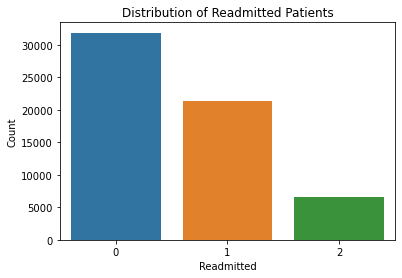

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='readmitted', data=final_data)

plt.title('Distribution of Readmitted Patients')
plt.xlabel('Readmitted')
plt.ylabel('Count')

# Display the plot
plt.show()

# 0 represents 
# 1 represents
# 2 represents

### Race

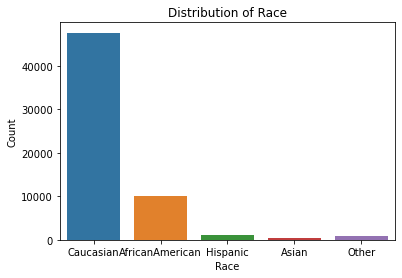

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='race', data=final_data)

plt.title('Distribution of Race')
plt.xlabel('Race')
plt.ylabel('Count')

# Display the plot
plt.show()

### Gender

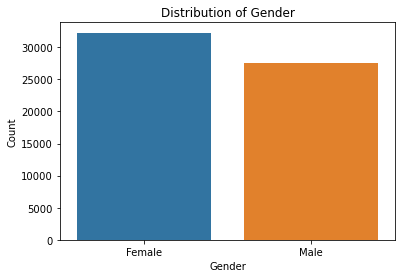

In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='gender', data=final_data)

plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# Display the plot
plt.show()

### Age

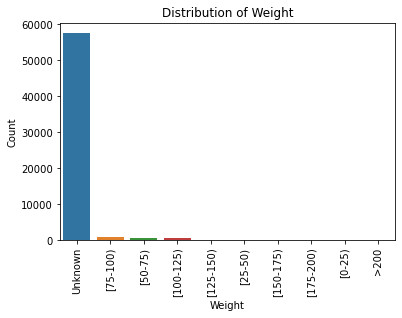

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='weight', data=final_data)

plt.title('Distribution of Weight')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.xticks(rotation = 90)

# Display the plot
plt.show()

### Weight

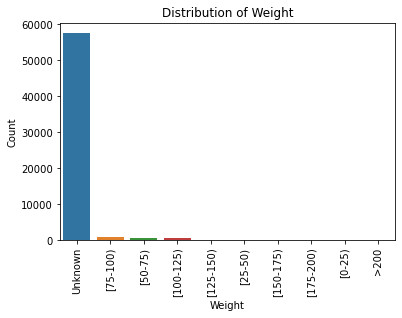

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='weight', data=final_data)

plt.title('Distribution of Weight')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.xticks(rotation = 90)


# Display the plot
plt.show()

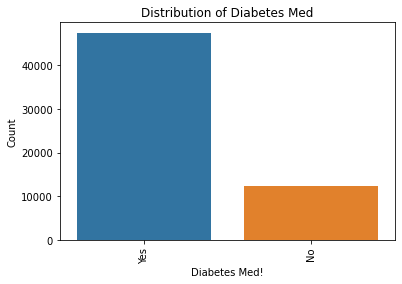

In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='diabetesMed', data=final_data)

plt.title('Distribution of Diabetes Med')
plt.xlabel('Diabetes Med!')
plt.ylabel('Count')
plt.xticks(rotation = 90)


# Display the plot
plt.show()

In [75]:
categorical_col

Index(['race', 'gender', 'age', 'weight', 'payer_code', 'medical_specialty',
       'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [76]:
numerical_col

Index(['encounter_id', 'patient_nbr', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses', 'readmitted'],
      dtype='object')

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_univariate_distribution(final_data, column_name):
   
    plt.figure(figsize=(8,6))
    sns.histplot(final_data[column_name], kde=True, color='#3498db', bins=20)
    plt.title(f'Distribution of {column_name}', fontsize=16)
    plt.xlabel(column_name, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.show()

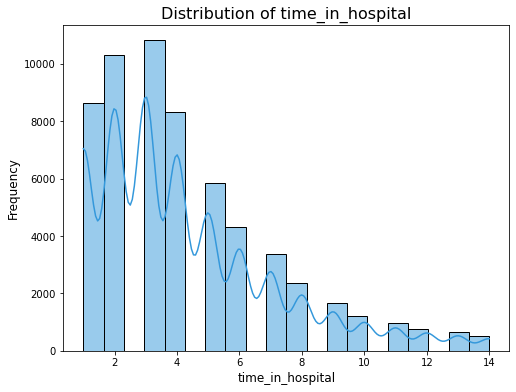

In [78]:
plot_univariate_distribution(numerical_cols, 'time_in_hospital')


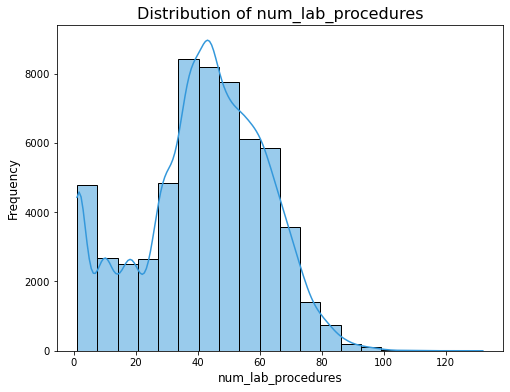

In [79]:
plot_univariate_distribution(numerical_cols, 'num_lab_procedures')


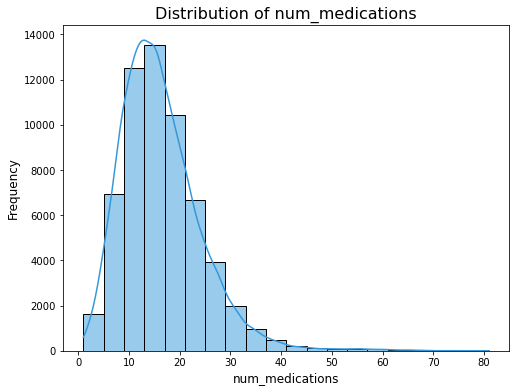

In [80]:
plot_univariate_distribution(numerical_cols, 'num_medications')


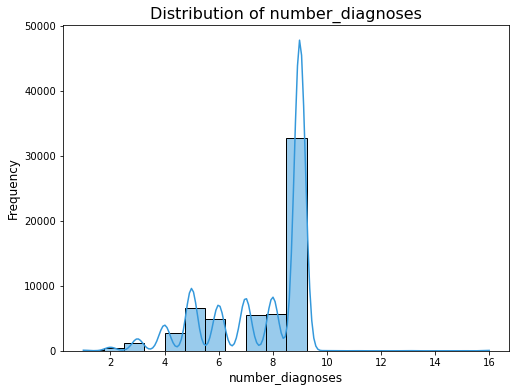

In [81]:
plot_univariate_distribution(numerical_cols, 'number_diagnoses')


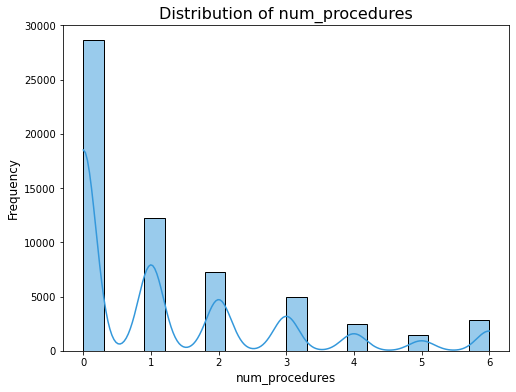

In [82]:
plot_univariate_distribution(numerical_cols, 'num_procedures')


## Bivariate Analysis

#### Age vs Readmitted

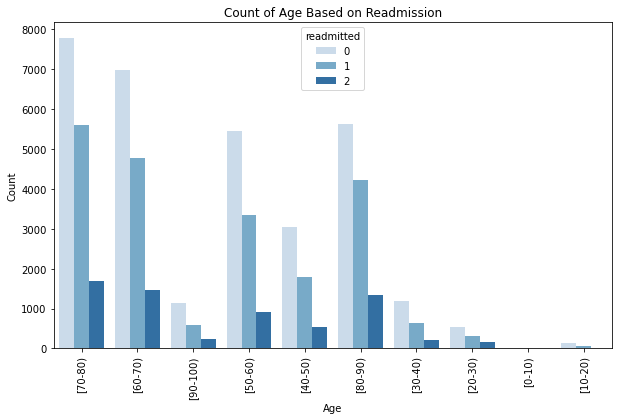

In [83]:
plt.figure(figsize=(10, 6))
sns.countplot(x='age', hue='readmitted', data=final_data, palette='Blues')

plt.title('Count of Age Based on Readmission')
plt.xlabel('Age')
plt.ylabel('Count')


plt.xticks(rotation=90)  
plt.show()


#### Weight vs Readmitted

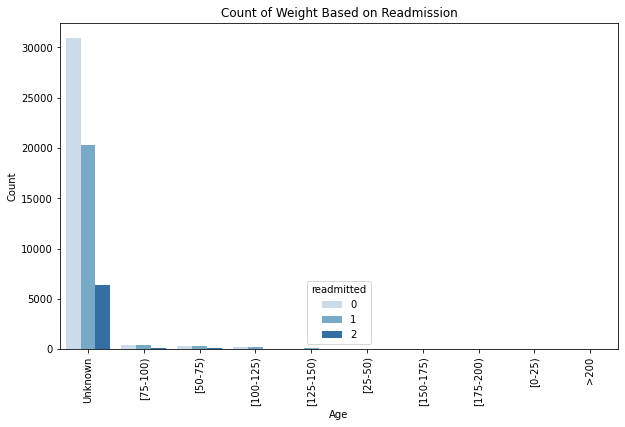

In [91]:
plt.figure(figsize=(10, 6))
sns.countplot(x='weight', hue='readmitted', data=final_data, palette='Blues')

plt.title('Count of Weight Based on Readmission')
plt.xlabel('Age')
plt.ylabel('Count')


plt.xticks(rotation=90)  
plt.show()


#### Race vs Readmitted

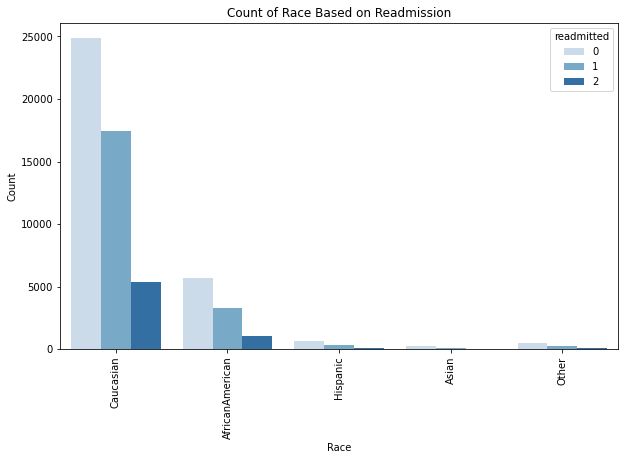

In [92]:
plt.figure(figsize=(10, 6))
sns.countplot(x='race', hue='readmitted', data=final_data, palette='Blues')

plt.title('Count of Race Based on Readmission')
plt.xlabel('Race')
plt.ylabel('Count')


plt.xticks(rotation=90)  
plt.show()


#### Gender vs Readmitted

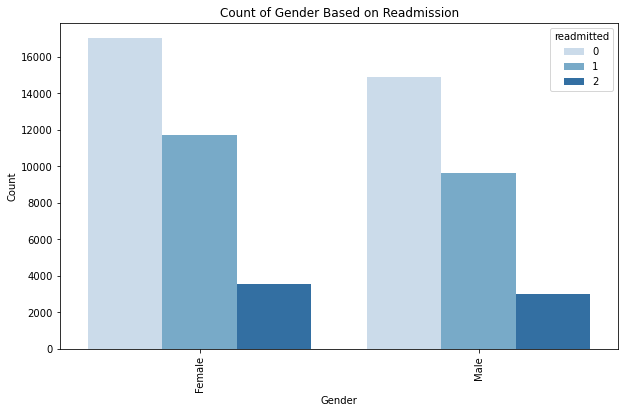

In [93]:
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', hue='readmitted', data=final_data, palette='Blues')

plt.title('Count of Gender Based on Readmission')
plt.xlabel('Gender')
plt.ylabel('Count')


plt.xticks(rotation=90)  
plt.show()


#### Payer Code vs Readmitted

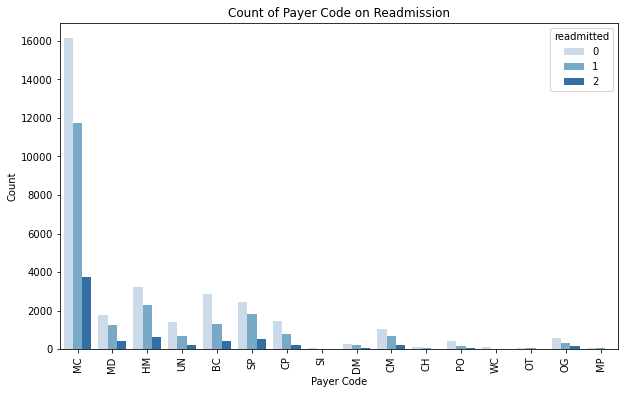

In [94]:
plt.figure(figsize=(10, 6))
sns.countplot(x='payer_code', hue='readmitted', data=final_data, palette='Blues')

plt.title('Count of Payer Code on Readmission')
plt.xlabel('Payer Code')
plt.ylabel('Count')


plt.xticks(rotation=90)  
plt.show()


#### Times In Hospital vs Readmitted

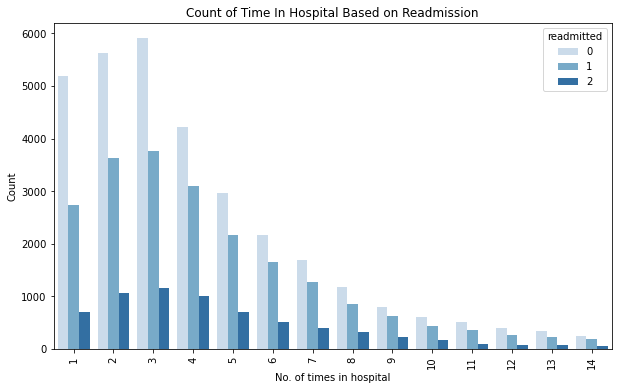

In [96]:
plt.figure(figsize=(10, 6))
sns.countplot(x='time_in_hospital', hue='readmitted', data=final_data, palette='Blues')

plt.title('Count of Time In Hospital Based on Readmission')
plt.xlabel('No. of times in hospital')
plt.ylabel('Count')


plt.xticks(rotation=90)  
plt.show()


#### Insulin vs Readmitted

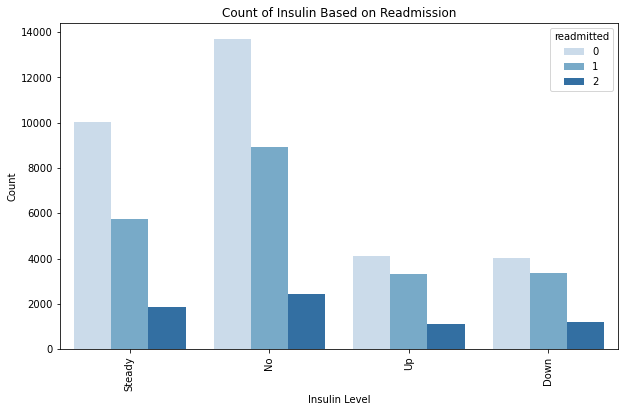

In [97]:
plt.figure(figsize=(10, 6))
sns.countplot(x='insulin', hue='readmitted', data=final_data, palette='Blues')

plt.title('Count of Insulin Based on Readmission')
plt.xlabel('Insulin Level')
plt.ylabel('Count')


plt.xticks(rotation=90)  
plt.show()


#### Taking Diabetes Medication vs Readmitted

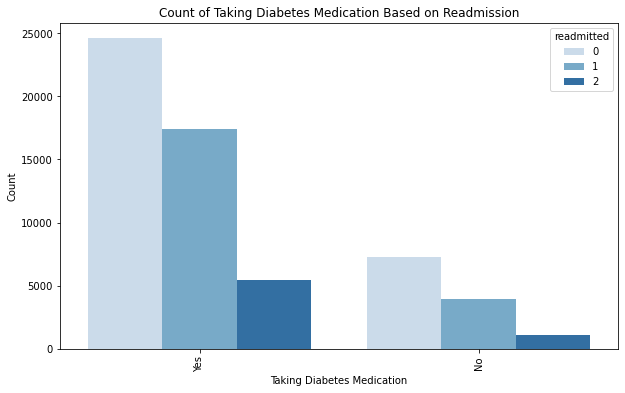

In [98]:
plt.figure(figsize=(10, 6))
sns.countplot(x='diabetesMed', hue='readmitted', data=final_data, palette='Blues')

plt.title('Count of Taking Diabetes Medication Based on Readmission')
plt.xlabel('Taking Diabetes Medication')
plt.ylabel('Count')


plt.xticks(rotation=90)  
plt.show()
